<a href="https://colab.research.google.com/github/Molashhs/spotifyTCS/blob/main/DSRP_Spotify_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Loading in Data, cleaning data, as well as expirementing for what I want to do



In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.feature_selection import SelectKBest
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, accuracy_score
from sklearn.preprocessing import LabelEncoder

!pip install scikit-learn
from sklearn import datasets, model_selection
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.datasets import make_regression

In [2]:
url = "https://docs.google.com/spreadsheets/d/e/2PACX-1vQmfwC6rSgzudX7RUqTsBlCREZZ68yVQQRqI7otYj1Zkajk-y_iUfI80sSPlk6UftjdrU0z3hbJQ_F-/pub?output=csv"
spotify=pd.read_csv(url)

In [3]:
spotify.head()

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6


In [4]:
spotify.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953 entries, 0 to 952
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   track_name            953 non-null    object
 1   artist(s)_name        953 non-null    object
 2   artist_count          953 non-null    int64 
 3   released_year         953 non-null    int64 
 4   released_month        953 non-null    int64 
 5   released_day          953 non-null    int64 
 6   in_spotify_playlists  953 non-null    int64 
 7   in_spotify_charts     953 non-null    int64 
 8   streams               953 non-null    object
 9   in_apple_playlists    953 non-null    int64 
 10  in_apple_charts       953 non-null    int64 
 11  in_deezer_playlists   953 non-null    object
 12  in_deezer_charts      953 non-null    int64 
 13  in_shazam_charts      903 non-null    object
 14  bpm                   953 non-null    int64 
 15  key                   858 non-null    ob

In [5]:
spotify.dropna()
spotify.drop_duplicates()


,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
948,My Mind & Me,Selena Gomez,1,2022,11,3,953,0,91473363,61,...,144,A,Major,60,24,39,57,0,8,3
949,Bigger Than The Whole Sky,Taylor Swift,1,2022,10,21,1180,0,121871870,4,...,166,F#,Major,42,7,24,83,1,12,6
950,A Veces (feat. Feid),"Feid, Paulo Londra",2,2022,11,3,573,0,73513683,2,...,92,C#,Major,80,81,67,4,0,8,6
951,En La De Ella,"Feid, Sech, Jhayco",3,2022,10,20,1320,0,133895612,29,...,97,C#,Major,82,67,77,8,0,12,5


In [6]:
spotify.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953 entries, 0 to 952
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   track_name            953 non-null    object
 1   artist(s)_name        953 non-null    object
 2   artist_count          953 non-null    int64 
 3   released_year         953 non-null    int64 
 4   released_month        953 non-null    int64 
 5   released_day          953 non-null    int64 
 6   in_spotify_playlists  953 non-null    int64 
 7   in_spotify_charts     953 non-null    int64 
 8   streams               953 non-null    object
 9   in_apple_playlists    953 non-null    int64 
 10  in_apple_charts       953 non-null    int64 
 11  in_deezer_playlists   953 non-null    object
 12  in_deezer_charts      953 non-null    int64 
 13  in_shazam_charts      903 non-null    object
 14  bpm                   953 non-null    int64 
 15  key                   858 non-null    ob

In [7]:
#potential reasearch question = does the amount of spotify playlist the song is included affect the raning in charts

Text(0.5, 1.0, 'Amount of Playlist vs Rank in Charts')

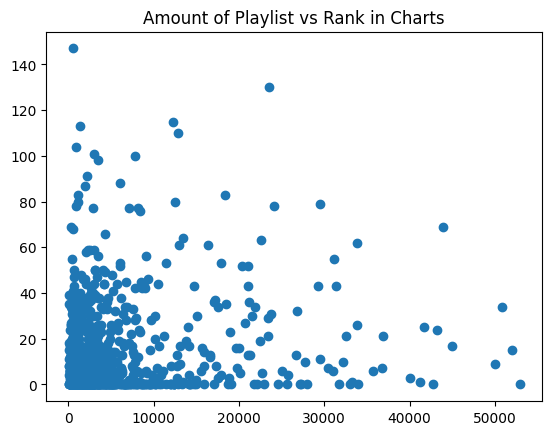

In [8]:
plt.scatter(spotify['in_spotify_playlists'], spotify['in_spotify_charts'])
plt.title("Amount of Playlist vs Rank in Charts")

In [9]:
#new idea for research queston. I could see whcih factors affect the dancibility percentage the most. Maybe like BPM, Energy, and Mode

In [10]:
x1=(spotify['bpm'])
x2=(spotify['energy_%'])
x3=(spotify['speechiness_%'])
y0=(spotify['danceability_%'])

 Made a visualization fo what the comparisons could look like but due to mode not being a nurmeric it made a weird chat, even so chart befor i added mode worked better have both BPM and Energy level on same place so yay.

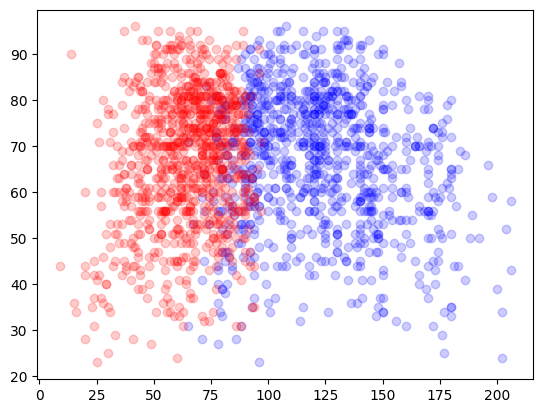

In [11]:
plt.scatter(x1,y0,color='blue',label="Chart1", alpha=0.2)
plt.scatter(x2,y0,color='red',label="Chart2", alpha=0.2)

I might change it to a line graph instead of a scatter plot isntead.
Sadly energy might not be the best since it also correlates with bpm since energy is messured with bpm so possible problem

In [13]:
new_mode = {"Major": 2, "Minor": 1}
spotify["mode"] = spotify["mode"].map(new_mode)
print(new_mode)

{'Major': 2, 'Minor': 1}


I've come to realize that Mode might not be the best to use in my analysis so i will probably be dropping it for something else, I'm thinking maybe streams or maybe speechniness but as seen above I dont know if they'll be the best.

idead make take random amount of songs and analyze these factors: example randome sample of songs say 50 or 100 will be take and look at their dpm, energy, and streams instead of taking all 900+ songs and making the graph look ugly. though I dont know how I'll do it thats hopefully the plan.

Update new idea as well try a bar graph as well with showing how much each each affect it.

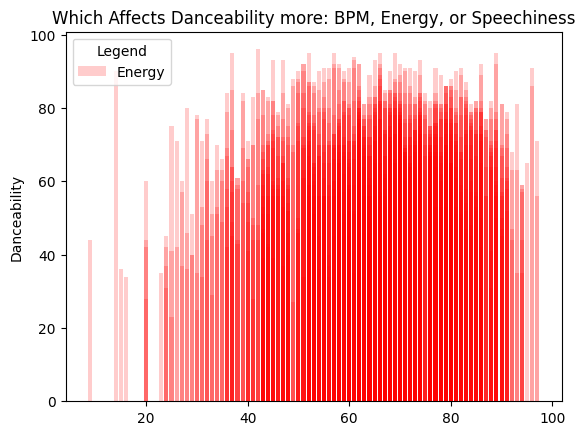

In [14]:
plt.bar(spotify['energy_%'], y0, color='red', label="Energy", alpha=0.2)
plt.ylabel("Danceability")
plt.title("Which Affects Danceability more: BPM, Energy, or Speechiness")
plt.legend(title="Legend")
plt.show()

<BarContainer object of 953 artists>

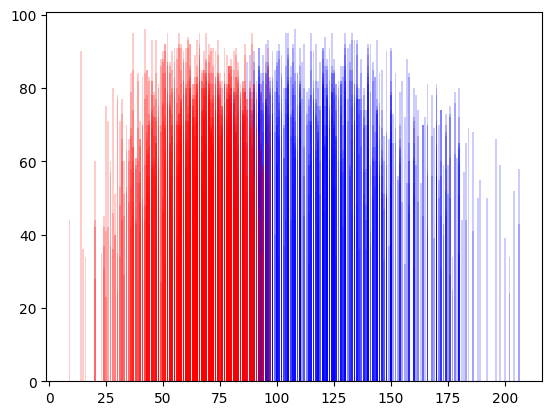

In [15]:
plt.bar(x1,y0,color='blue',label="Chart1", alpha=0.2)
plt.bar(x2,y0,color='red',label="Chart2", alpha=0.2)

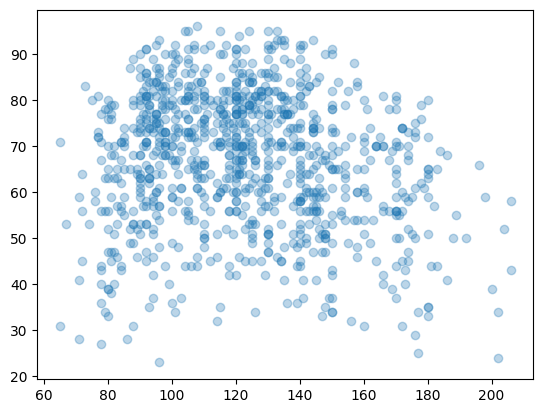

In [16]:
plt.scatter(spotify['bpm'],y0, alpha=0.3)

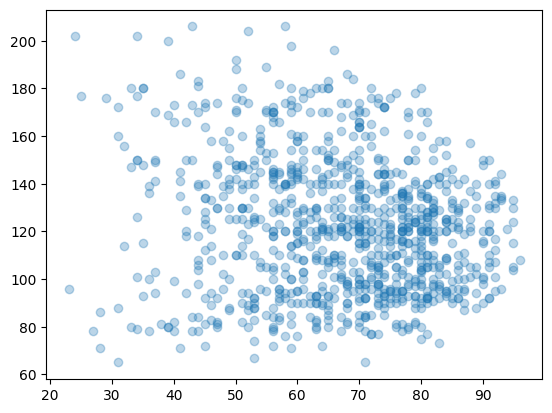

In [17]:
plt.scatter(y0,spotify['bpm'],alpha=0.3)

In [18]:
sspotify = spotify.sample(n=50)
display(sspotify.head())

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
842,Love Of My Life,Harry Styles,1,2022,5,20,1933,0,233671263,13,...,118,G,2,56,20,54,67,0,6,5
349,Kahani Suno 2.0,Kaifi Khalil,1,2022,5,31,162,6,156777415,1,...,140,B,2,58,26,38,91,0,10,4
306,La Bebe,Yng Lvcas,1,2021,12,24,489,17,191945597,4,...,170,D,1,78,75,46,62,0,12,35
399,TV,Billie Eilish,1,2022,7,21,3009,2,338564981,68,...,141,E,1,41,9,25,84,1,14,4
443,Rockin' Around The Christmas Tree,Brenda Lee,1,1958,1,1,14994,0,769213520,191,...,140,G#,2,70,85,41,71,0,45,5


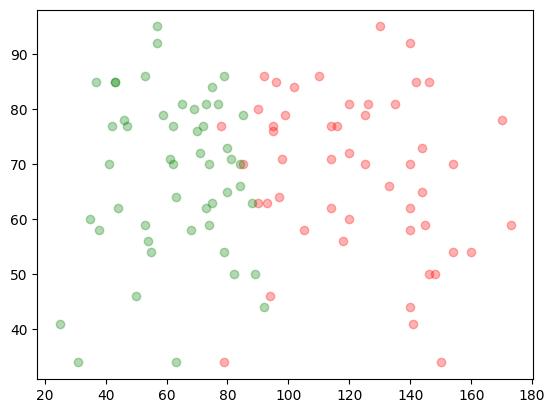

In [19]:
plt.scatter(sspotify['bpm'],sspotify['danceability_%'], color='red',alpha=0.3)
plt.scatter(sspotify['energy_%'],sspotify['danceability_%'], color='green',alpha=0.3)

New idea use linear regression to compare by fidning a line of  best fit

After speaking with mentor new idea is to compare the BPM throughout generations for example 1900's vs 2010's vs 2020's (to see if it affects the streams?)

In [44]:
spot = spotify['released_year']
spot.value_counts()

,count
released_year,
2022,402
2023,175
2021,119
2020,37
2019,36
2017,23
2016,18
2013,13
2014,13


Making a miniset for songs made in the 1900's 2010's and 2020's

In [21]:
spot190 = spotify[(spotify['released_year'] >= 1990) & (spotify['released_year'] < 2000)]
print(spot190['released_year'].value_counts())

released_year
1999    5
1995    2
1991    2
1992    1
1997    1
1994    1
1996    1
1998    1
Name: count, dtype: int64


In [22]:
spot220 = spotify[spotify['released_year'] >= 2020]
print(spot220['released_year'].value_counts())

released_year
2022    402
2023    175
2021    119
2020     37
Name: count, dtype: int64


In [23]:
spot210 = spotify[(spotify['released_year'] > 2010) & (spotify['released_year'] < 2020)]
print(spot210['released_year'].value_counts())

released_year
2019    36
2017    23
2016    18
2014    13
2013    13
2015    11
2018    10
2012    10
2011    10
Name: count, dtype: int64


In [24]:
spot200 = spotify[(spotify['released_year'] >= 2000) & (spotify['released_year'] <= 2010)]
print(spot200['released_year'].value_counts())

released_year
2010    7
2002    6
2000    4
2004    4
2003    2
2008    2
2007    1
2005    1
Name: count, dtype: int64


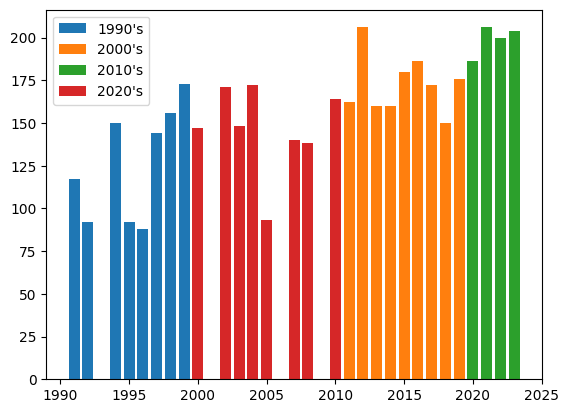

In [25]:
plt.bar(spot190['released_year'],spot190['bpm'],label="1990's")
plt.bar(spot210['released_year'],spot210['bpm'],label="2000's")
plt.bar(spot220['released_year'],spot220['bpm'],label="2010's")
plt.bar(spot200['released_year'],spot200['bpm'],label="2020's")
plt.legend()
plt.show()

In [26]:
avb190 = spot190['bpm'].mean()
avb200 = spot200['bpm'].mean()
avb210 = spot210['bpm'].mean()
avb220 = spot220['bpm'].mean()

print(f"Average BPM for songs released in the 1990s: {avb190:.2f}")
print(f"Average BPM for songs released in the 2000s: {avb200:.2f}")
print(f"Average BPM for songs released in the 2010s: {avb210:.2f}")
print(f"Average BPM for songs released in the 2020s: {avb220:.2f}")

Average BPM for songs released in the 1990s: 114.29
Average BPM for songs released in the 2000s: 121.22
Average BPM for songs released in the 2010s: 121.41
Average BPM for songs released in the 2020s: 122.92


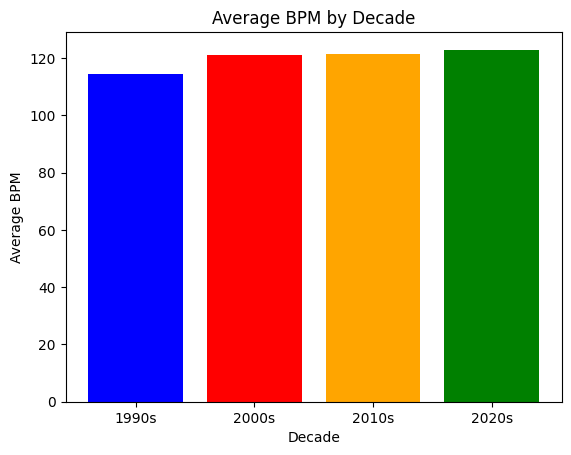

In [27]:
decades = ['1990s', '2000s', '2010s', '2020s']
average_bpms = [avb190, avb200, avb210, avb220]

plt.bar(decades, average_bpms, color=['blue', 'red', 'orange', 'green'])
plt.xlabel('Decade')
plt.ylabel('Average BPM')
plt.title('Average BPM by Decade')
plt.show()

Data analysis using a linear regression modle

In [28]:
from sklearn.linear_model import LinearRegression
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris, load_breast_cancer, fetch_california_housing
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.feature_selection import SelectKBest, chi2, f_classif
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from scipy.stats import ttest_ind, ttest_rel

In [29]:
from sklearn.linear_model import LinearRegression

In [30]:
reg = LinearRegression()

so for my linear regression model I could make a machine learning model that predicts the streams by the relative bpm to the average bpm given from the mean of the previous decades.

In [31]:
# Null hypothesis the bpm has nothing to do with amount of streams, alternitvely there is a correlation between the bpm and streams

In [32]:
spotify.dropna(subset=['streams'])

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,2,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,2,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,2,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,2,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,1,65,23,80,14,63,11,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
948,My Mind & Me,Selena Gomez,1,2022,11,3,953,0,91473363,61,...,144,A,2,60,24,39,57,0,8,3
949,Bigger Than The Whole Sky,Taylor Swift,1,2022,10,21,1180,0,121871870,4,...,166,F#,2,42,7,24,83,1,12,6
950,A Veces (feat. Feid),"Feid, Paulo Londra",2,2022,11,3,573,0,73513683,2,...,92,C#,2,80,81,67,4,0,8,6
951,En La De Ella,"Feid, Sech, Jhayco",3,2022,10,20,1320,0,133895612,29,...,97,C#,2,82,67,77,8,0,12,5


# ML model (hopefully)/Wasting time(future me)

In [33]:
spotify = spotify.drop(574)
#needed to get rid of this row due to it having string in a numerical column
display(spotify.head())

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,2,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,2,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,2,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,2,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,1,65,23,80,14,63,11,6


In [34]:
features = spotify[['bpm',]]
labels = spotify['released_year']

In [35]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(features, labels, test_size=0.2, random_state=42)

In [36]:
reg.fit(X_train, y_train)
pred = reg.predict(X_test)

In [38]:
print('mean squared: ', mean_squared_error(y_test, pred))

print('r squared: ', r2_score(y_test, pred))

mean squared:  112.63008534096409
r squared:  -0.00019282633816275485


My r squared is low but I shall still push forward even if negative.

After getting some adivice from my mentor I have decided to find the mean of each year on the graph to make my model more accurate. I will probably be usng a Knn model i think and so yeah.

In [62]:
#Making independent varibales for each year so i can get the mean and use it to make a accurate ML model.

spot191 = spotify[spotify['released_year'] == 1991]
print(spot191['released_year'].value_counts())
spot192 = spotify[spotify['released_year'] == 1992]
print(spot192['released_year'].value_counts())
spot194 = spotify[spotify['released_year'] == 1994]#No values in 2003
print(spot194['released_year'].value_counts())
spot195 = spotify[spotify['released_year'] == 1995]
print(spot195['released_year'].value_counts())
spot196 = spotify[spotify['released_year'] == 1996]
print(spot196['released_year'].value_counts())
spot197 = spotify[spotify['released_year'] == 1997]
print(spot197['released_year'].value_counts())
spot198 = spotify[spotify['released_year'] == 1998]
print(spot198['released_year'].value_counts())
spot199 = spotify[spotify['released_year'] == 1999]
print(spot199['released_year'].value_counts())
spot2000 = spotify[spotify['released_year'] == 2000]
print(spot2000['released_year'].value_counts())
spot202 = spotify[spotify['released_year'] == 2002]#no vlaues in 2001
print(spot202['released_year'].value_counts())
spot203 = spotify[spotify['released_year'] == 2003]
print(spot203['released_year'].value_counts())
spot204 = spotify[spotify['released_year'] == 2004]
print(spot204['released_year'].value_counts())
spot205 = spotify[spotify['released_year'] == 2005]
print(spot205['released_year'].value_counts())
spot206 = spotify[spotify['released_year'] == 2006]
print(spot206['released_year'].value_counts())
spot207 = spotify[spotify['released_year'] == 2007]
print(spot207['released_year'].value_counts())
spot208 = spotify[spotify['released_year'] == 2008]
print(spot208['released_year'].value_counts())
spot2010 = spotify[spotify['released_year'] == 2010]#No value in 2009
print(spot2010['released_year'].value_counts())
spot211 = spotify[spotify['released_year'] == 2011]
print(spot211['released_year'].value_counts())
spot212 = spotify[spotify['released_year'] == 2012]
print(spot212['released_year'].value_counts())
spot213 = spotify[spotify['released_year'] == 2013]
print(spot213['released_year'].value_counts())
spot214 = spotify[spotify['released_year'] == 2014]
print(spot214['released_year'].value_counts())
spot215 = spotify[spotify['released_year'] == 2015]
print(spot215['released_year'].value_counts())
spot216 = spotify[spotify['released_year'] == 2016]
print(spot216['released_year'].value_counts())
spot217 = spotify[spotify['released_year'] == 2017]
print(spot217['released_year'].value_counts())
spot218 = spotify[spotify['released_year'] == 2018]
print(spot218['released_year'].value_counts())
spot219 = spotify[spotify['released_year'] == 2019]
print(spot219['released_year'].value_counts())
spot2020 = spotify[spotify['released_year'] == 2020]
print(spot2020['released_year'].value_counts())
spot221 = spotify[spotify['released_year'] == 2021]
print(spot221['released_year'].value_counts())
spot222 = spotify[spotify['released_year'] == 2022]
print(spot222['released_year'].value_counts())
spot223 = spotify[spotify['released_year'] == 2023]
print(spot223['released_year'].value_counts())#Ugly it be, but working is she

released_year
1991    2
Name: count, dtype: int64
released_year
1992    1
Name: count, dtype: int64
released_year
1994    1
Name: count, dtype: int64
released_year
1995    2
Name: count, dtype: int64
released_year
1996    1
Name: count, dtype: int64
released_year
1997    1
Name: count, dtype: int64
released_year
1998    1
Name: count, dtype: int64
released_year
1999    5
Name: count, dtype: int64
released_year
2000    4
Name: count, dtype: int64
Series([], Name: count, dtype: int64)
released_year
2002    6
Name: count, dtype: int64
released_year
2003    2
Name: count, dtype: int64
released_year
2004    4
Name: count, dtype: int64
released_year
2005    1
Name: count, dtype: int64
Series([], Name: count, dtype: int64)
released_year
2007    1
Name: count, dtype: int64
released_year
2008    2
Name: count, dtype: int64
released_year
2010    7
Name: count, dtype: int64
released_year
2011    10
Name: count, dtype: int64
released_year
2012    10
Name: count, dtype: int64
released_year
2013    

In [67]:
#Getting average of all the years
avb191 = spot191['bpm'].mean()
print(f"Average BPM for songs released in the 1991: {avb191:.2f}")
avb192 = spot192['bpm'].mean()
print(f"Average BPM for songs released in the 1992: {avb192:.2f}")
avb194 = spot194['bpm'].mean()
print(f"Average BPM for songs released in the 1994: {avb194:.2f}")
avb195 = spot195['bpm'].mean()
print(f"Average BPM for songs released in the 1995: {avb195:.2f}")
avb196 = spot196['bpm'].mean()
print(f"Average BPM for songs released in the 1996: {avb196:.2f}")
avb197 = spot197['bpm'].mean()
print(f"Average BPM for songs released in the 1997: {avb197:.2f}")
avb198 = spot198['bpm'].mean()
print(f"Average BPM for songs released in the 1994: {avb198:.2f}")
avb199 = spot199['bpm'].mean()
print(f"Average BPM for songs released in the 1994: {avb199:.2f}")
avb2000 = spot2000['bpm'].mean()
print(f"Average BPM for songs released in the 2000: {avb2000:.2f}")
avb202 = spot202['bpm'].mean()
print(f"Average BPM for songs released in the 2002: {avb202:.2f}")
avb203 = spot203['bpm'].mean()
print(f"Average BPM for songs released in the 2003: {avb203:.2f}")
avb204 = spot204['bpm'].mean()
print(f"Average BPM for songs released in the 2004: {avb204:.2f}")
avb205 = spot205['bpm'].mean()
print(f"Average BPM for songs released in the 2005: {avb205:.2f}")
avb207 = spot207['bpm'].mean()
print(f"Average BPM for songs released in the 2007: {avb207:.2f}")
avb208 = spot208['bpm'].mean()
print(f"Average BPM for songs released in the 2008: {avb208:.2f}")
avb2010 = spot2010['bpm'].mean()
print(f"Average BPM for songs released in the 2010: {avb2010:.2f}")
avb211 = spot211['bpm'].mean()
print(f"Average BPM for songs released in the 2011: {avb211:.2f}")
avb212 = spot212['bpm'].mean()
print(f"Average BPM for songs released in the 2012: {avb212:.2f}")
avb213 = spot213['bpm'].mean()
print(f"Average BPM for songs released in the 2013: {avb213:.2f}")
avb214 = spot214['bpm'].mean()
print(f"Average BPM for songs released in the 2014: {avb214:.2f}")
avb215 = spot215['bpm'].mean()
print(f"Average BPM for songs released in the 2015: {avb215:.2f}")
avb216 = spot216['bpm'].mean()
print(f"Average BPM for songs released in the 2016: {avb216:.2f}")
avb217 = spot217['bpm'].mean()
print(f"Average BPM for songs released in the 2017: {avb217:.2f}")
avb218 = spot218['bpm'].mean()
print(f"Average BPM for songs released in the 2018: {avb218:.2f}")
avb219 = spot219['bpm'].mean()
print(f"Average BPM for songs released in the 2019: {avb219:.2f}")
avb2020 = spot2020['bpm'].mean()
print(f"Average BPM for songs released in the 2020: {avb2020:.2f}")
avb221 = spot221['bpm'].mean()
print(f"Average BPM for songs released in the 2021: {avb221:.2f}")
avb222 = spot222['bpm'].mean()
print(f"Average BPM for songs released in the 2022: {avb222:.2f}")
avb223 = spot223['bpm'].mean()
print(f"Average BPM for songs released in the 2023: {avb223:.2f}")#Ugly is this code, but she shall be my humble abode

Average BPM for songs released in the 1991: 111.50
Average BPM for songs released in the 1992: 92.00
Average BPM for songs released in the 1994: 150.00
Average BPM for songs released in the 1995: 86.00
Average BPM for songs released in the 1996: 88.00
Average BPM for songs released in the 1997: 144.00
Average BPM for songs released in the 1994: 156.00
Average BPM for songs released in the 1994: 115.00
Average BPM for songs released in the 2000: 114.75
Average BPM for songs released in the 2002: 136.67
Average BPM for songs released in the 2003: 129.00
Average BPM for songs released in the 2004: 111.75
Average BPM for songs released in the 2005: 93.00
Average BPM for songs released in the 2007: 140.00
Average BPM for songs released in the 2008: 113.00
Average BPM for songs released in the 2010: 118.57
Average BPM for songs released in the 2011: 127.90
Average BPM for songs released in the 2012: 142.80
Average BPM for songs released in the 2013: 120.08
Average BPM for songs released in t

After doing this i realized I had wasted my time making the exact same graph as above with a more repetitive code.



*   Go do research (done)
*   Make ML model (done)



#New and final research question (hopefully) As well as ML model
## Does the decade a song is released correlate to the bpm. Can this help predict future trends

In [92]:
#Made a data frame for all the years from 1990-2026 to make it easier in genral.
all_years = range(1990, 2026)
average_bpms_by_year = {}

for year in all_years:
    year_data = spotify[spotify['released_year'] == year]
    if not year_data.empty:
        average_bpm = year_data['bpm'].mean()
        average_bpms_by_year[year] = average_bpm
    else:
        average_bpms_by_year[year] = None

# Create a DataFrame from the average BPMs by year
average_bpm_df = pd.DataFrame.from_dict(average_bpms_by_year, orient='index', columns=['Average BPM'])
average_bpm_df = average_bpm_df.dropna().reset_index()
average_bpm_df.columns = ['Year', 'Average BPM']

display(average_bpm_df.head())

,Year,Average BPM
0,1991,111.5
1,1992,92.0
2,1994,150.0
3,1995,86.0
4,1996,88.0


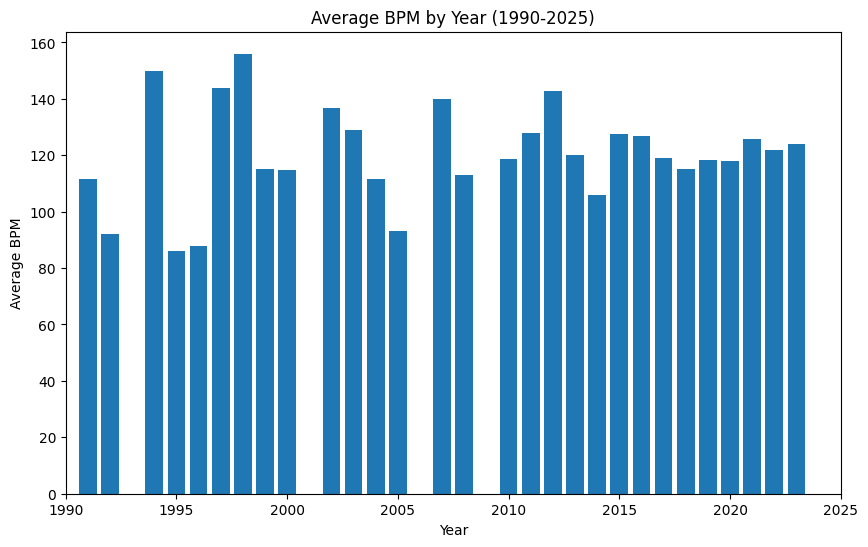

In [104]:
#Made a visualization of the averge BPM throughout the years to see patterns
plt.figure(figsize=(10, 6))
plt.bar(average_bpm_df['Year'], average_bpm_df['Average BPM'])
plt.xlabel('Year')
plt.ylabel('Average BPM')
plt.title('Average BPM by Year (1990-2025)')
plt.xlim(1990, 2025) # Set the x-axis limits
plt.xticks(range(1990, 2026, 5)) # Set ticks every 5 years
plt.show()

In [94]:
# Prepared my features (Year) and target variable (Average BPM)
X = average_bpm_df[['Year']]
y = average_bpm_df['Average BPM']

In [95]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [96]:
# Created and trained the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [97]:
# Evaluated the model
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared: {r2:.2f}")

Mean Squared Error: 186.38
R-squared: -0.02


In [98]:
# Predict future BPMs
future_years = np.arange(2024, 2036).reshape(-1, 1) # Predict for the next 10 years
predicted_bpms = model.predict(future_years)

# Create a DataFrame for predicted future BPMs
predicted_future_bpm_df = pd.DataFrame({'Year': future_years.flatten(), 'Predicted Average BPM': predicted_bpms})
display(predicted_future_bpm_df.head())

,Year,Predicted Average BPM
0,2024,124.912254
1,2025,125.153578
2,2026,125.394902
3,2027,125.636227
4,2028,125.877551


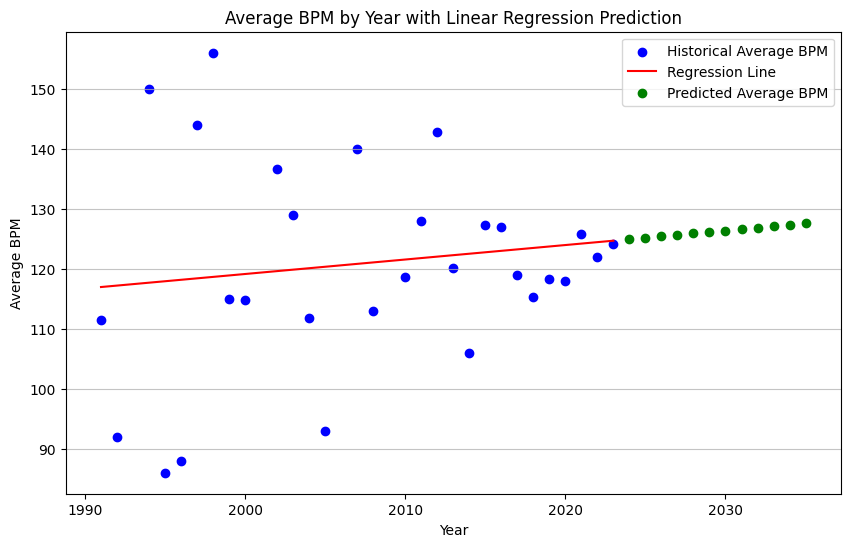

In [101]:
# Lastly visualized the model itself (hazza!)

plt.figure(figsize=(10, 6))

# "Historical" data
plt.scatter(average_bpm_df['Year'], average_bpm_df['Average BPM'], color='blue', label='Historical Average BPM')

# Regression line
plt.plot(average_bpm_df['Year'], model.predict(average_bpm_df[['Year']]), color='red', label='Regression Line')

# Predicted future BPMs
plt.scatter(predicted_future_bpm_df['Year'], predicted_future_bpm_df['Predicted Average BPM'], color='green', label='Predicted Average BPM')

plt.xlabel('Year')
plt.ylabel('Average BPM')
plt.title('Average BPM by Year with Linear Regression Prediction')
plt.legend()
plt.grid(axis='y', alpha=0.75)
plt.show()